# Pathfinding demo

In [ ]:
#
# Imports
#

import matplotlib.pyplot as plt
import numpy as np
from typing import Protocol
from dataclasses import dataclass

In [34]:
#
# Type and interfaces definition
#

Point2D = tuple[int, int] # tuple(x, y)
Path = list[Point2D]

class Map:
    """
    2D map consisting of cells with given cost
    """
    array: np.array

    def __init__(self, width: int, height: int):
        assert width > 0
        assert height > 0
        self.array = np.zeros((width, height))

    def randomize(self, low: float = 0.0, high: float = 1.0):
        self.array = np.random.uniform(low, high, self.array.shape)

        

class PathFinder(Protocol):
    def SetMap(m: Map):
        ...
    def SetStartingPoint(p: Point2D):
        ...
    def SetEndPoint(p: Point2D):
        ...
    def CalculatePath() -> Path:
        """
        Calculate path on a given map.
        Note: map must be set first using SetMap
        """
        ...

In [68]:
#
# Drawing utilities
#

class Visualizer:
    _axes: plt.Axes

    def draw_map(self, m: Map) -> tuple[plt.Figure, plt.Axes]:
        M, N = m.array.shape
        _, ax = plt.subplots()
        ax.imshow(m.array, cmap='terrain', origin='lower', interpolation='none')
        self._axes = ax

    def draw_path(self, path: Path, color='red', label: str = None):
        xs, ys = zip(*path)                
        self._axes.plot(xs, ys, 'o-', color='blue', label='Path')
        self._axes.plot(xs[0],  ys[0],  'o', color='lime',  markersize=8)  # start
        self._axes.plot(xs[-1], ys[-1], 'o', color='magenta', markersize=8)  # goal
        

[(0, 0), (5, 5), (6, 6), (1, 9)]


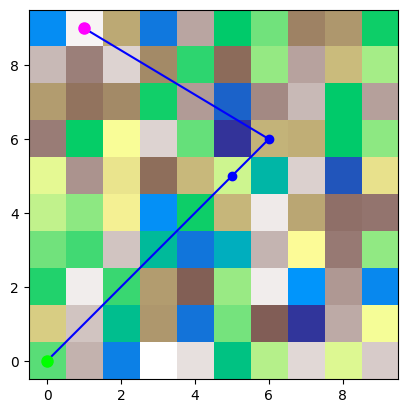

In [69]:
m = Map(10, 10)
m.randomize()
path: Path = [(0,0), (5,5), (6,6), (1,9)]
v = Visualizer()
v.draw_map(m)
print(path)
v.draw_path(path)